<a href="https://colab.research.google.com/github/SSDivyaRavali/PRACTICE/blob/main/Linear_Classification_iris_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target #X, y = datasets.load_iris(return_X_y=True)
#print(iris.target.target_names)
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


**Note:** For efficiency reasons, scikit-learn methods work on NumPy
instead of ndarrays the more descriptive but much less efficient Python dictionaries or lists.

In [8]:
print(X_iris[0], y_iris[0])

[5.1 3.5 1.4 0.2] 0


In [11]:
#BUILDING Training dataset
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
from sklearn import preprocessing
# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print (X_train.shape, y_train.shape)
# Standardize the features
#to avoid that features with large values may weight too much on final results
much on the final results.
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(112, 2) (112,)


Text(0, 0.5, 'Sepal width')

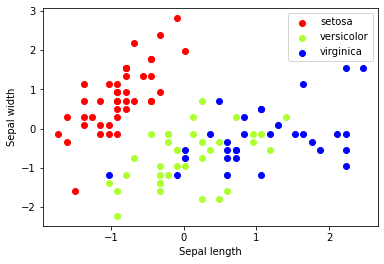

In [19]:
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
  xs = X_train[:, 0][y_train == i]
  ys = X_train[:, 1][y_train == i]
  plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Linear classification models, tries to do: build a line (or, more generally, a
hyperplane in the feature space) that best separates both the target classes, and use it as a decision boundary (that is, the class membership depends on what side of the hyperplane the instance is).


To use any method in scikit-learn, we must first create the corresponding classifier object, initialize its parameters, and train the model that better fits the training data.The fit function is probably the most important one in scikit-learn. It receives the training data and the training classes, and builds the classifier. Every supervised learning method in scikit-learn implements this function.

In [23]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

SGD stands for Stochastic Gradient Descent, a very popular numerical procedure
to find the local minimum of a function (in this case, the loss function, which
measures how far every instance is from our boundary). The algorithm will learn the coefficients of the hyperplane by minimizing the loss function.

In [24]:
print(clf.coef_)#coefficients of the linear boundary of hyperplane 

[[-22.17306845  12.87004956]
 [  4.39636666   1.37829113]
 [  8.33459733  -2.06563111]]


In [25]:
print(clf.intercept_) #the point of intersection of the line with the y axis.

[-10.80342592  -9.11606975  -8.38515788]


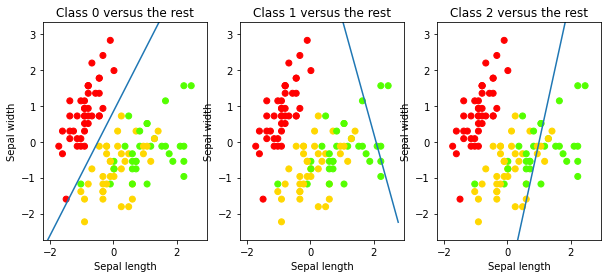

In [40]:
#Decision Boundary 
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() +.5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() +.5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 4)
for i in [0, 1, 2]:
 axes[i].set_title('Class '+ str(i) + ' versus the rest')
 axes[i].set_xlabel('Sepal length')
 axes[i].set_ylabel('Sepal width')
 axes[i].set_xlim(x_min, x_max)
 axes[i].set_ylim(y_min, y_max)
 plt.sca(axes[i])
 plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=plt.cm.prism)
 ys = (-clf.intercept_[i]-xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
 plt.plot(xs, ys)

In [42]:
#Predict new datapoint
print(clf.predict(scaler.transform([[4.7, 3.1]])))

[0]


**Linear models are essentially binary** Our prediction procedure
combines the result of the three binary classifiers and selects the class in which it is more confident. In this case, we will select the boundary line whose distance to the instance is longer.

In [44]:
print(clf.decision_function(scaler.transform([[4.7, 3.1]])))

[[ 18.21094533 -14.53685151 -19.05711554]]


In [ ]:
#linear support vector machine
clf1 = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf1.score(X_test, y_test)

In [46]:
#MODEL EVALUATION 
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))

0.6517857142857143


In [48]:
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7105263157894737


Accuracy on the test set is a good performance measure when the number of instances of each class is similar, that is, we have a uniform distribution of classes.

In [49]:
print(metrics.classification_report(y_test, y_pred,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.00      0.00      0.00        11
   virginica       0.63      1.00      0.78        19

    accuracy                           0.71        38
   macro avg       0.54      0.67      0.59        38
weighted avg       0.53      0.71      0.60        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation functions such as F1  assume a binary classification problem and two classes—a positive one and a negative one.

• Precision: This computes the proportion of instances predicted as positives
that were correctly evaluated (it measures how right our classifier is when it
says that an instance is positive).

• Recall: This counts the proportion of positive instances that were correctly
evaluated (measuring how right our classifier is when faced with a positive
instance).

• F1-score: This is the harmonic mean of precision and recall, and tries to
combine both in a single number. The F-measure is defined as a harmonic mean of precision (P) and recall
(R)

  F =2P*R/P + R

In biomedicine, precision is called positive predictive value (PPV) and recall is called sensitivity.The harmonic mean is used instead of the arithmetic mean because the latter compensates low values for precision and with high values for recall (and vice versa). On the other hand, with harmonic mean we will always have low values if either precision or recall is low.

In [50]:
#Confusion matrix for multiclass
print(metrics.confusion_matrix(y_test, y_pred))

[[ 8  0  0]
 [ 0  0 11]
 [ 0  0 19]]


Another useful metric (especially for multi-class problems) is the confusion matrix:in its (i, j) cell, it shows the number of class instances i that were predicted tobe in class j. A good classifier will accumulate the values on the confusion matrix diagonal, where correctly classified instances belong.

# Cross-validation: evaluating estimator performance

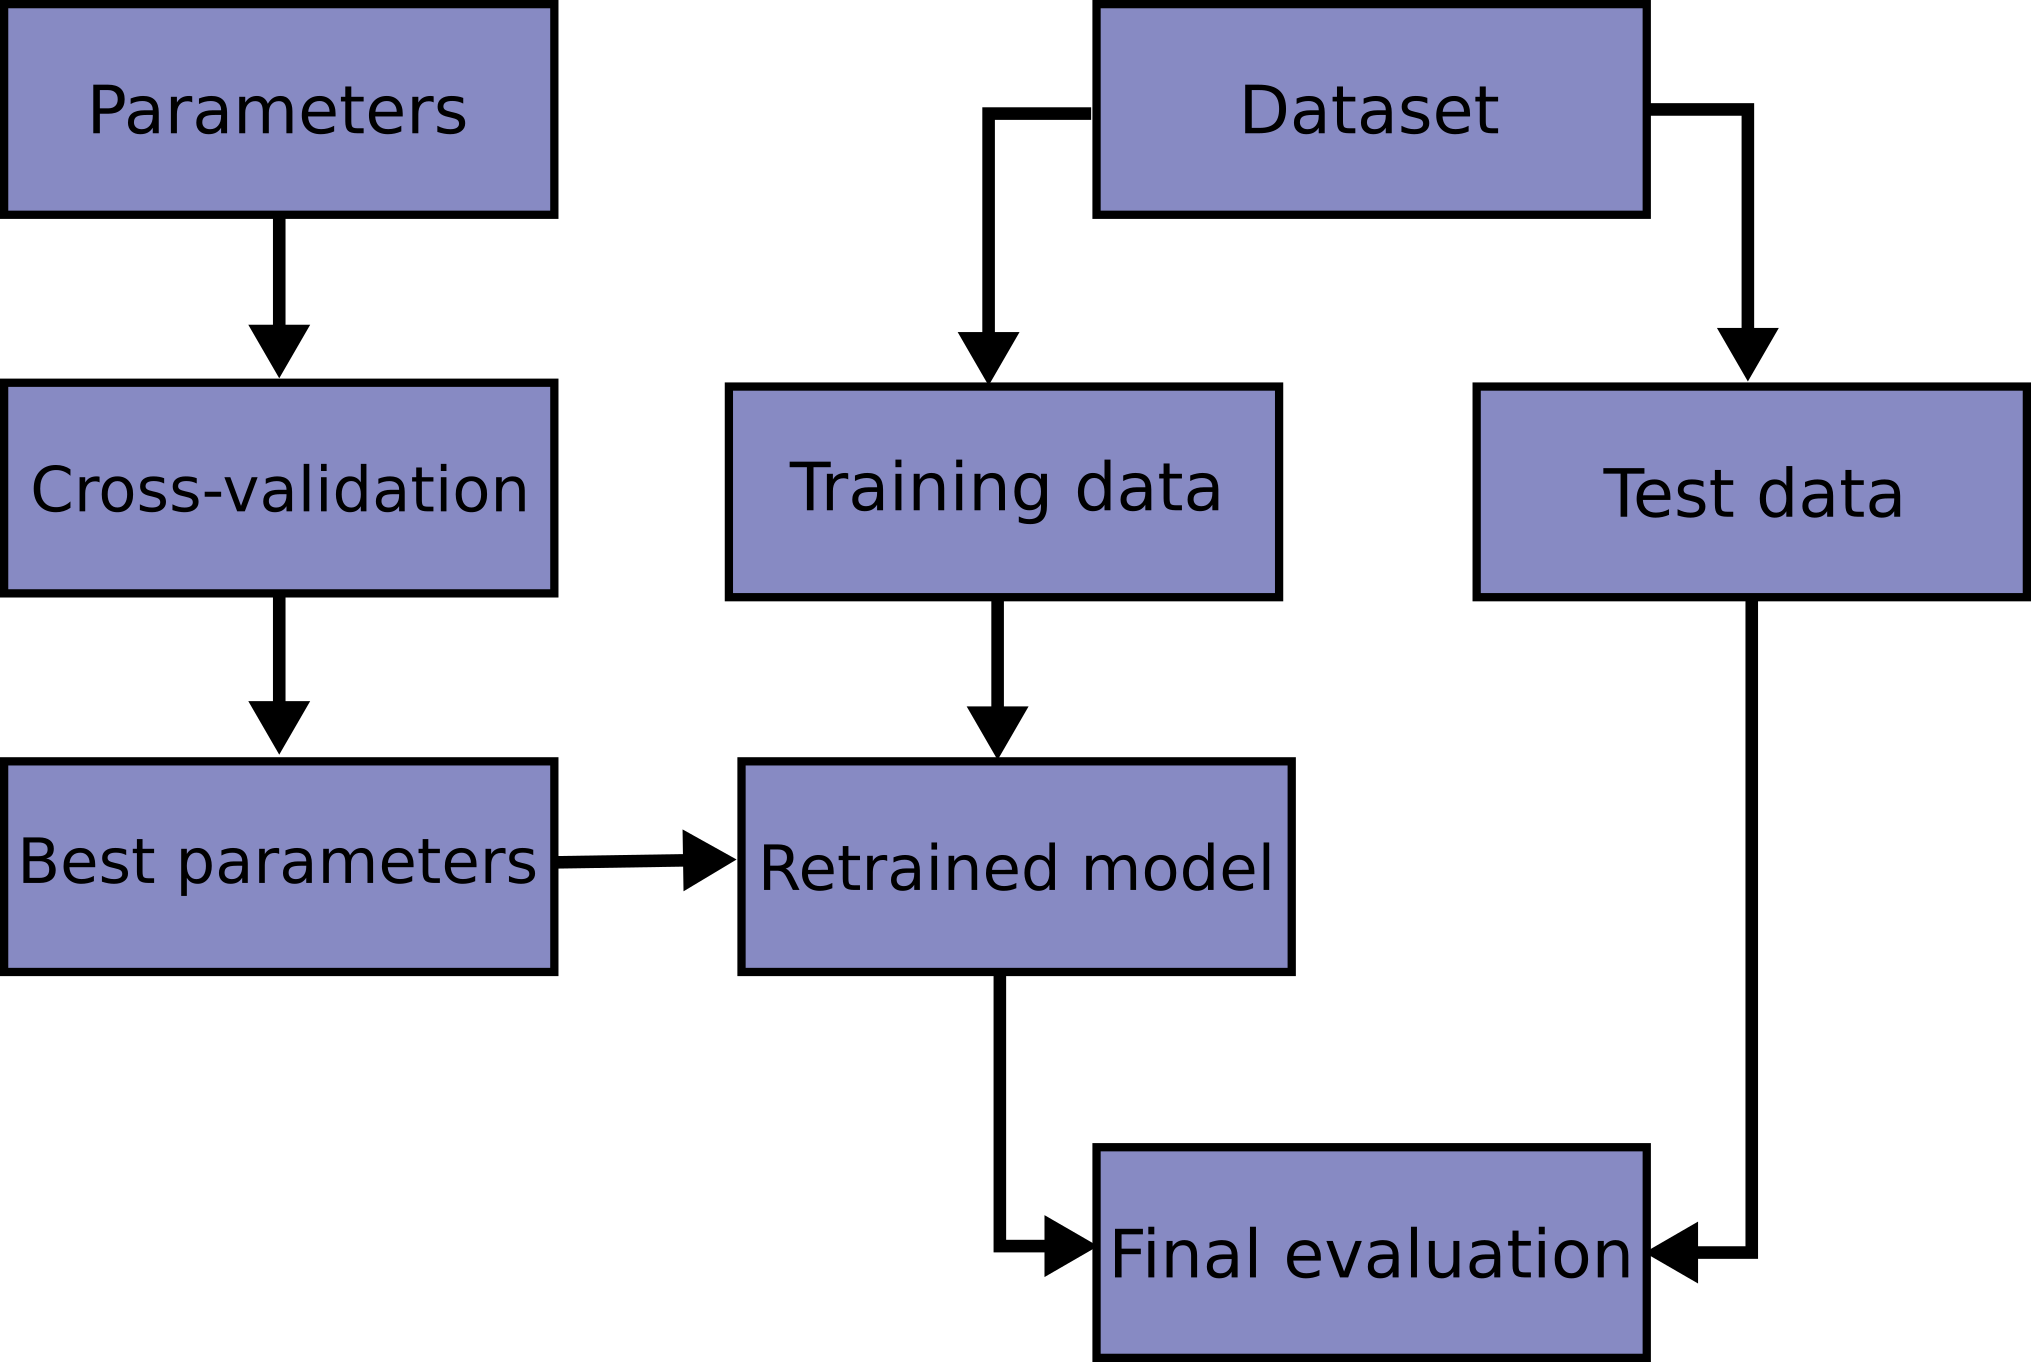

Flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques.

In [60]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([('scaler', StandardScaler()),
  ('linear_model', SGDClassifier())])
# create a k-fold cross validation iterator of k=5 folds
cv = KFold(X.shape[0],5,shuffle=True,random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)

TypeError: ignored